In [2]:
# Importing necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the training dataset into a dataframe
data = pd.read_excel('oasis_longitudinal_demographics.xlsx')

# Displaying first few records for understanding structure
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [3]:
# Summary staistics of the data for numeric variables
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.121584,0.729556,1.195460
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.135956,0.037141,0.138105
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1105.652499,0.644399,0.875539
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.330000,0.700191,1.098979
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.041312,0.728789,1.193844
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1596.936793,0.755669,1.292980
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.479526,0.836842,1.587298


In [4]:
# Summary staistics of the data for categorical variables
data.describe(include='O')

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


In [5]:
# Assuming these columns should uniquely identify a customer
columns_to_check = ['MRI ID']
substantial_duplicates = data[data.duplicated(columns_to_check, keep=False)]
print(f"Substantial duplicates found: {substantial_duplicates.shape[0]}")

Substantial duplicates found: 0


In [6]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
data["SES"].fillna(data["SES"].median(), inplace=True)
data["MMSE"].fillna(data["MMSE"].median(), inplace=True)

In [8]:
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
# Assuming these columns should uniquely identify a customer
columns_to_check = ['MRI ID']
substantial_duplicates = data[data.duplicated(columns_to_check, keep=False)]
print(f"Substantial duplicates found: {substantial_duplicates.shape[0]}")

Substantial duplicates found: 0


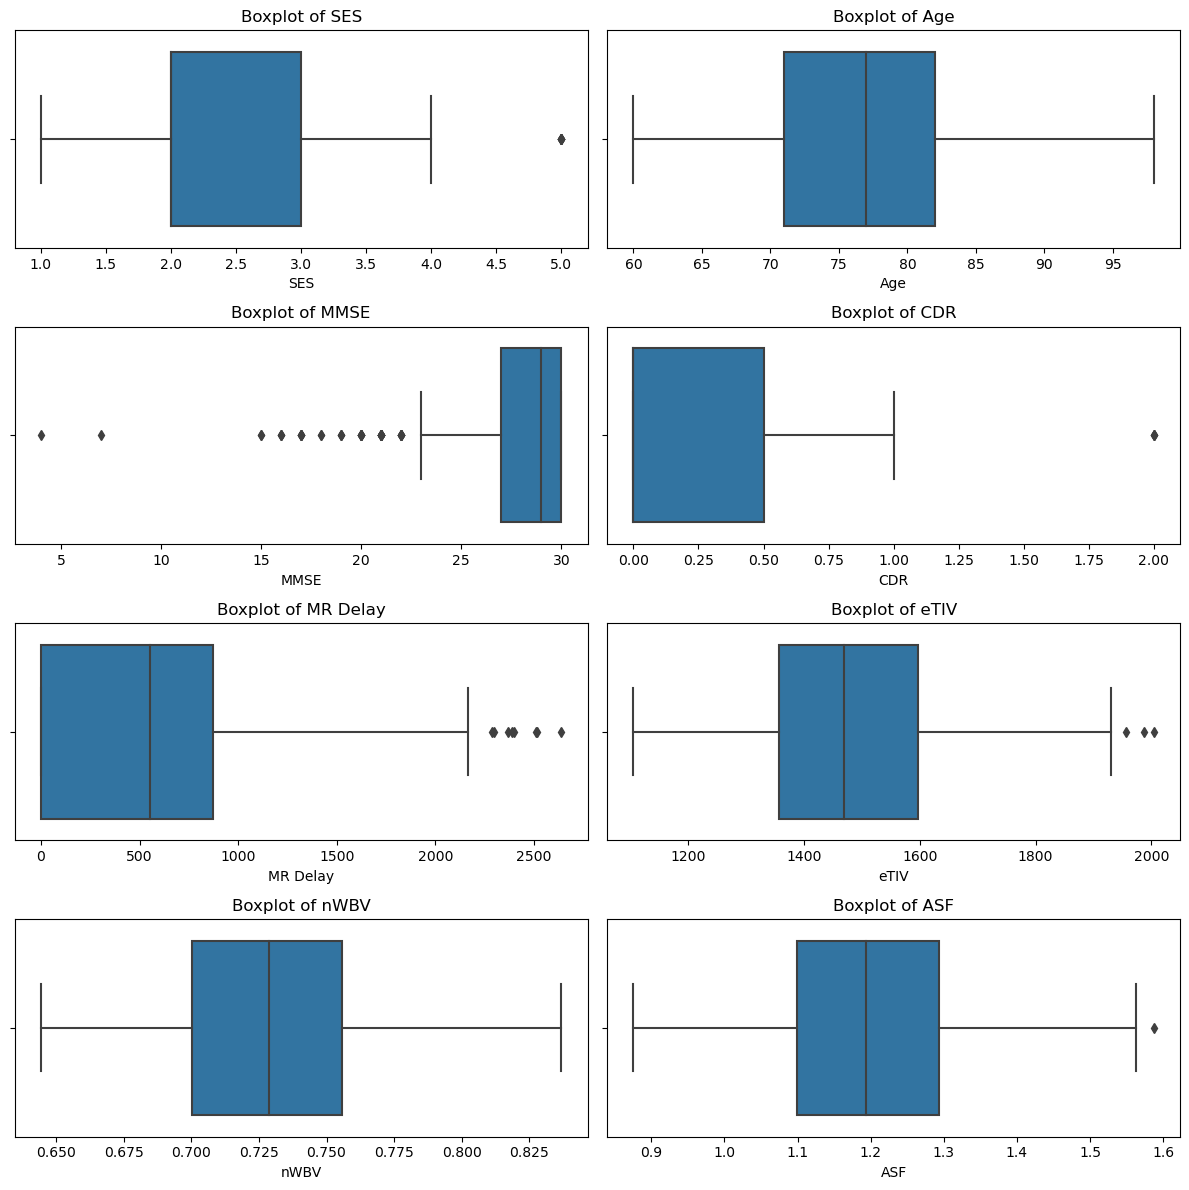

In [10]:
# Plotting boxplots for each variable to visually inspect outliers
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten() 

variables_of_interest = ['SES', 'Age', 'MMSE', 'CDR', 'MR Delay', 'eTIV', 'nWBV', 'ASF']
for i, variable in enumerate(variables_of_interest):
    sns.boxplot(x=data[variable], ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

# Adjusting layout to prevent overlap
plt.tight_layout()  
plt.show()

In [11]:
# Defining a function to calculate the IQR and identify outliers
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [12]:
# Applying the function to the 'CreditScore', 'Age', and 'Balance' features
SES_outliers = detect_outliers(data, 'SES')
MMSE_outliers = detect_outliers(data, 'MMSE')
CDR_outliers = detect_outliers(data, 'CDR')
MR_Delay_outliers = detect_outliers(data, 'MR Delay')
eTIV_outliers = detect_outliers(data, 'eTIV')
ASF_outliers = detect_outliers(data, 'ASF')

# Number of outliers in each feature
num_SES_outliers = SES_outliers.shape[0]
num_MMSE_outliers = MMSE_outliers.shape[0]
num_CDR_outliers = CDR_outliers.shape[0]
num_MR_Delay_outliers = MR_Delay_outliers.shape[0]
num_eTIV_outliers = eTIV_outliers.shape[0]
num_ASF_outliers = ASF_outliers.shape[0]

num_SES_outliers, num_MMSE_outliers, num_CDR_outliers, num_MR_Delay_outliers, num_eTIV_outliers, num_ASF_outliers

(7, 42, 3, 8, 3, 1)

# Data Visulaization

[Text(0.5, 1.0, 'Age Distribution')]

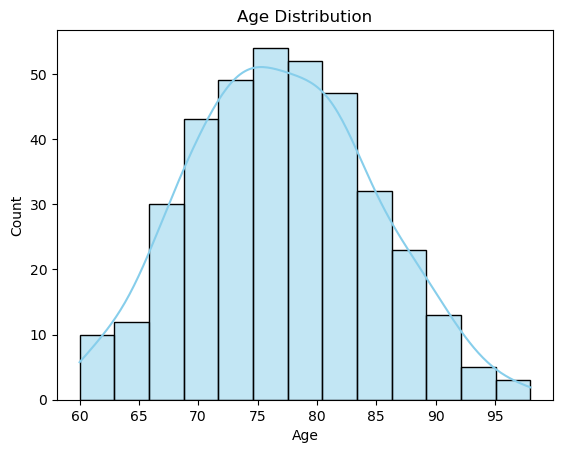

In [13]:
sns.histplot(data['Age'], kde=True, color='skyblue').set(title='Age Distribution')

[Text(0.5, 1.0, 'Education Years Distribution')]

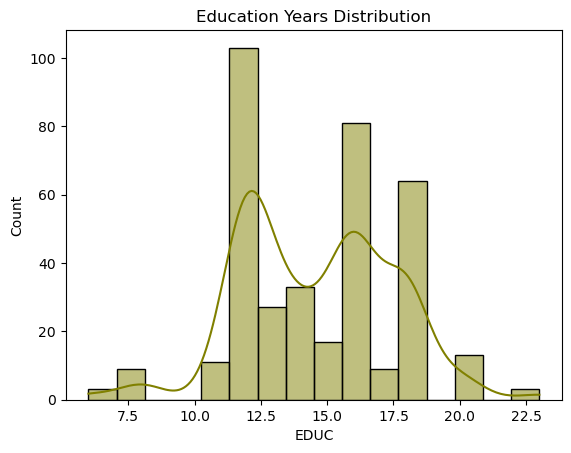

In [14]:
sns.histplot(data['EDUC'], kde=True, color='olive',).set(title='Education Years Distribution')

[Text(0.5, 1.0, 'SES Distribution')]

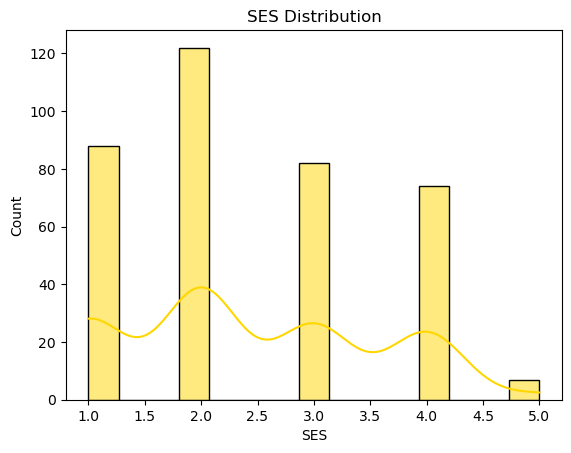

In [15]:
sns.histplot(data['SES'], kde=True, color='gold').set(title='SES Distribution')

[Text(0.5, 1.0, 'MMSE Score Distribution')]

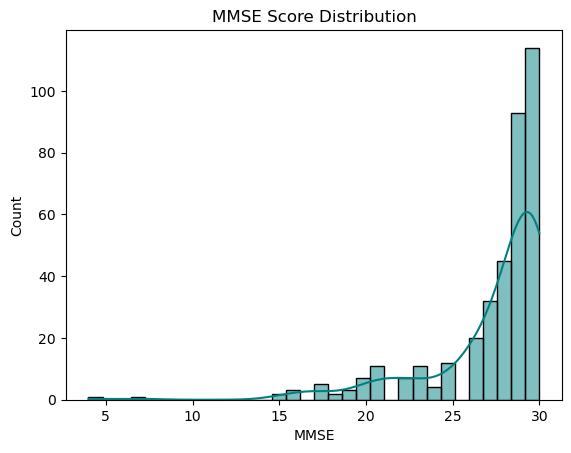

In [16]:
sns.histplot(data['MMSE'], kde=True, color='teal').set(title='MMSE Score Distribution')

[Text(0.5, 1.0, 'CDR Distribution')]

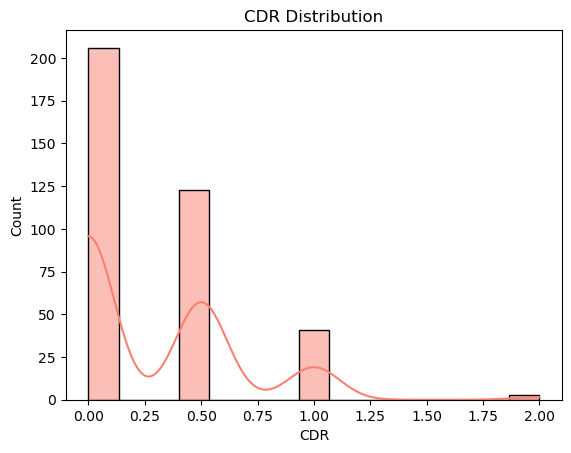

In [17]:
sns.histplot(data['CDR'], kde=True, color='salmon').set(title='CDR Distribution')

[Text(0.5, 1.0, 'Estimated Total Intracranial Volume Distribution')]

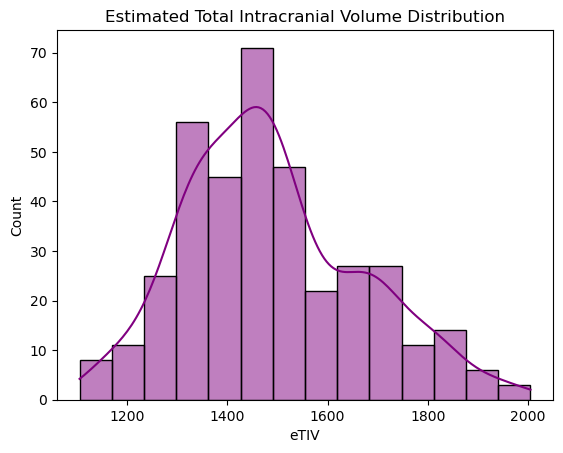

In [18]:
sns.histplot(data['eTIV'], kde=True,  color='purple').set(title='Estimated Total Intracranial Volume Distribution')

[Text(0.5, 1.0, 'Normalized Whole Brain Volume Distribution')]

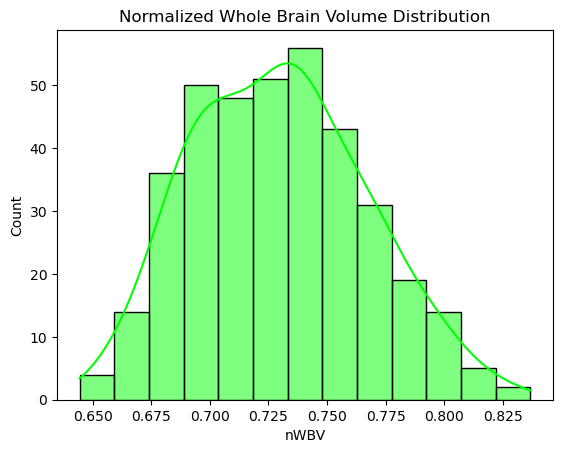

In [19]:
sns.histplot(data['nWBV'], kde=True, color='lime').set(title='Normalized Whole Brain Volume Distribution')

[Text(0.5, 1.0, 'Atlas Scaling Factor Distribution')]

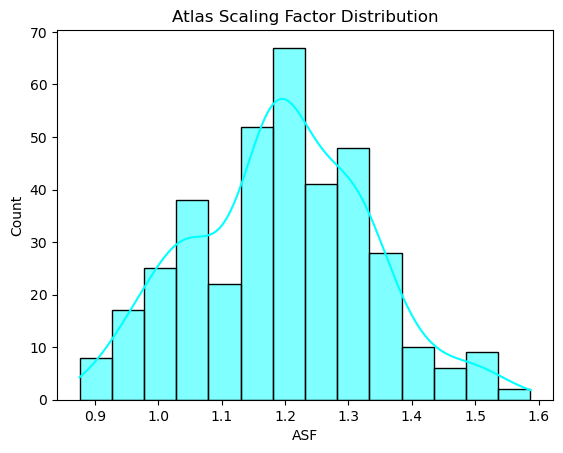

In [20]:
sns.histplot(data['ASF'], kde=True, color='cyan').set(title='Atlas Scaling Factor Distribution')

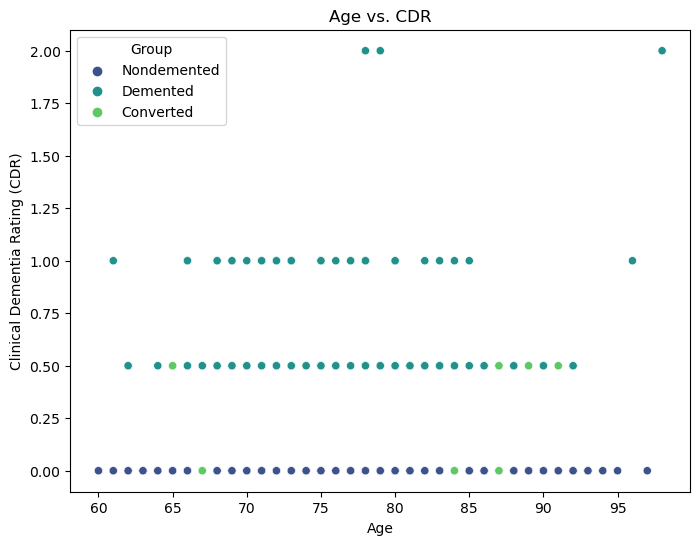

In [21]:
# Creating scatter plots for Age vs. CDR
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='CDR', hue='Group', palette='viridis')
plt.title('Age vs. CDR')
plt.xlabel('Age')
plt.ylabel('Clinical Dementia Rating (CDR)')
plt.show()

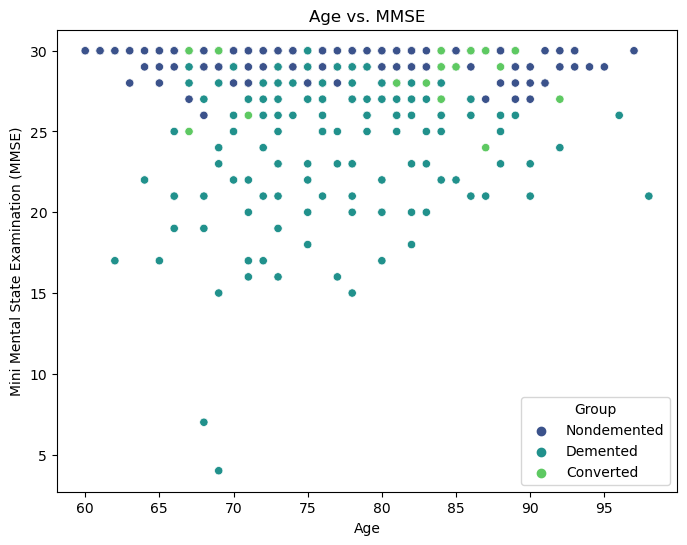

In [22]:
# Creating scatter plots for Age vs. MMSE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='MMSE', hue='Group', palette='viridis')
plt.title('Age vs. MMSE')
plt.xlabel('Age')
plt.ylabel('Mini Mental State Examination (MMSE)')
plt.show()

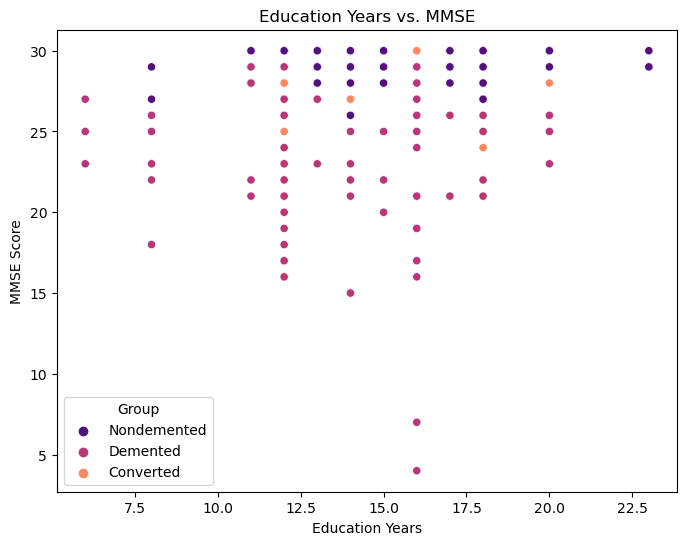

In [23]:
# Creating scatter plots for EDUC vs. MMSE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='EDUC', y='MMSE', hue='Group', palette='magma')
plt.title('Education Years vs. MMSE')
plt.xlabel('Education Years')
plt.ylabel('MMSE Score')
plt.show()

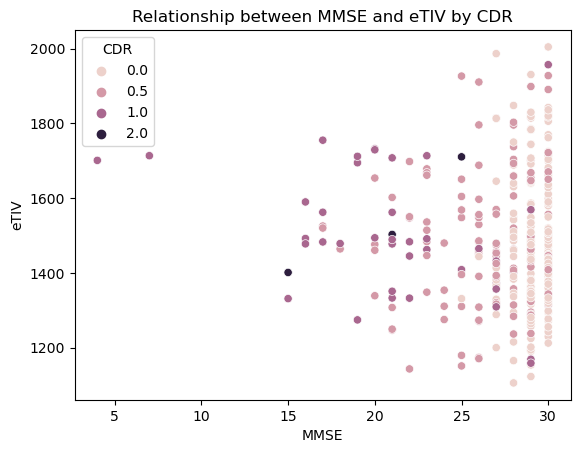

In [24]:
ax = sns.scatterplot(x='MMSE', y='eTIV', hue='CDR', data=data)
ax.set_title('Relationship between MMSE and eTIV by CDR')
plt.show()  

/var/folders/_3/_0fzmk1j1j35yxr_27mfzkb00000gn/T/ipykernel_16858/2669283597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


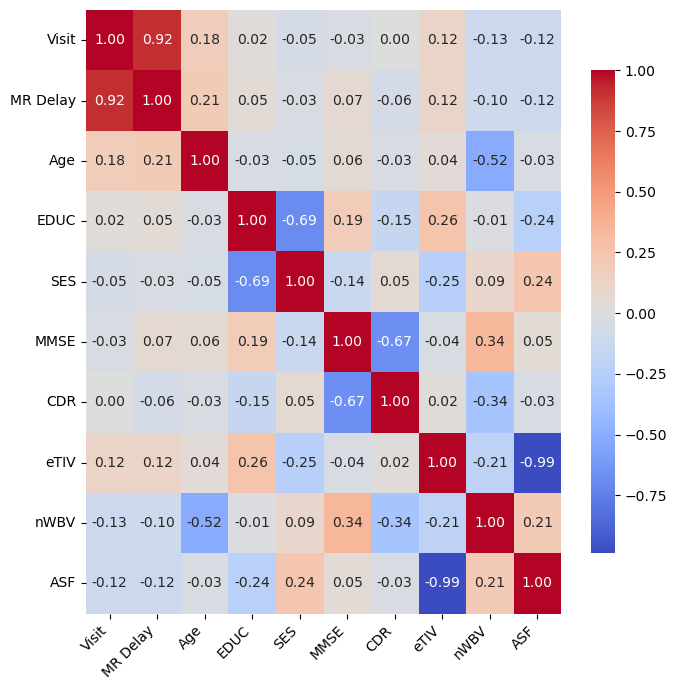

In [25]:
# Calculate the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(7, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={"shrink": .8})

# Adjust layout to make room for the rotated xtick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

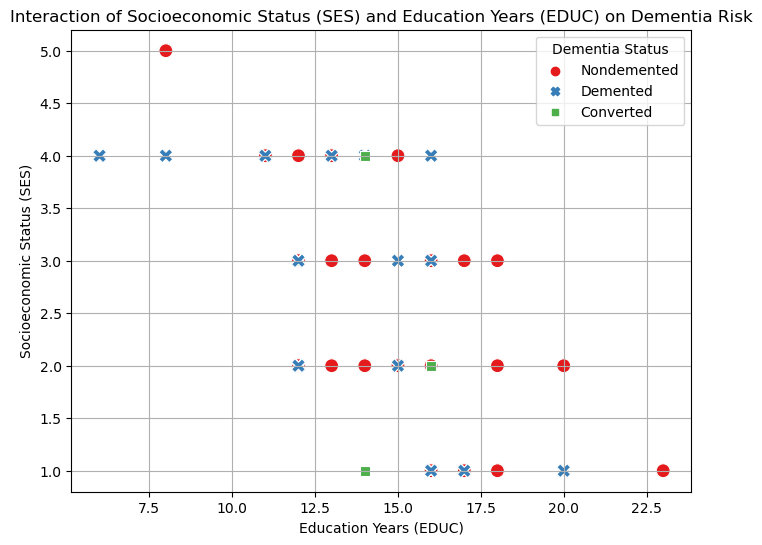

In [26]:
# Creating a scatter plot for SES vs. EDUC, grouped by 'Group' (Dementia status)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='EDUC', y='SES', hue='Group', style='Group', palette='Set1', s=100)
plt.title('Interaction of Socioeconomic Status (SES) and Education Years (EDUC) on Dementia Risk')
plt.xlabel('Education Years (EDUC)')
plt.ylabel('Socioeconomic Status (SES)')
plt.legend(title='Dementia Status', loc='upper right')
plt.grid(True)
plt.show()

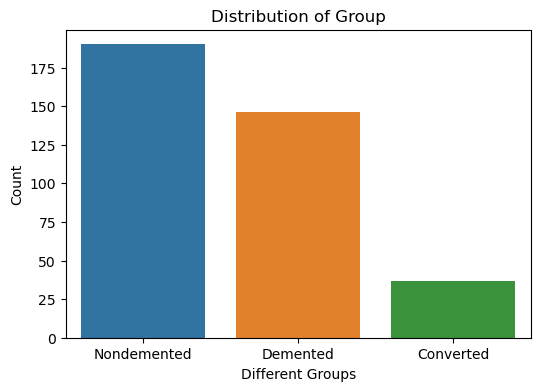

In [27]:
# Distribution of Age
plt.figure(figsize=(6, 4))
sns.countplot(x='Group', data=data)
plt.title('Distribution of Group')
plt.xlabel('Different Groups')
plt.ylabel('Count')
plt.show()

In [28]:
# dropping irrelevant columns
data_preprocessed=data.drop(['Subject ID','MRI ID','Hand', 'Visit'],axis=1)
data_preprocessed.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,Nondemented,457,M,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,Demented,0,M,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,Demented,560,M,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,Demented,1895,M,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [29]:
data_preprocessed["Group"].replace({"Nondemented":0,"Demented":1},inplace=True)
data_preprocessed["M/F"].replace({"M":0,"F":1},inplace=True)

In [30]:
data_preprocessed["Group"].replace({"Converted":1},inplace=True)

In [31]:
X=data_preprocessed.drop(["Group"],axis=1)
y=data_preprocessed["Group"]

In [32]:
# Importing necessary liberaries 
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Importing necessary liberaries and packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
!pip install xgboost
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
# Defining the classifiers to be used in the pipeline
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
   'MLPClassifier': MLPClassifier(random_state=1, max_iter=500,solver='adam'),
    'XGBClassifier':  XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [35]:
# Hyperparameters to tune for each classifier
param_grid = {
    'LogisticRegression': {'classifier__C': [0.1, 1.0, 10.0]},
    'RandomForestClassifier': {
        'classifier__n_estimators': [100, 200], 
        'classifier__max_depth': [None, 5, 10]
    },
    'GradientBoostingClassifier': {
        'classifier__n_estimators': [100, 200], 
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'MLPClassifier': {
        'classifier__activation': ['relu', 'logistic'], 
        'classifier__hidden_layer_sizes': [(3,), (20,), (20, 20), (50,), (50, 50), (100,)],
       'classifier__alpha': [0.0001, 0.001, 0.09, 0.1, 0.5]
    },
    'XGBClassifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 6, 9]
    }
}

In [36]:
# Results storage
best_estimators = {}
best_scores = {}

for name, clf in classifiers.items():
    # Creating a pipeline with the preprocessor and the classifier
    pipeline = Pipeline(steps=[
                               ('classifier', clf)])
    
    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid=param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Storing the best estimator and its score
    best_estimators[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    
    print(f"{name}: Best Score = {grid_search.best_score_:.4f}")

best_estimators, best_scores

/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression: Best Score = 0.9631
RandomForestClassifier: Best Score = 0.9631
GradientBoostingClassifier: Best Score = 0.9597


/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/pyth

MLPClassifier: Best Score = 0.6720
XGBClassifier: Best Score = 0.9631


({'LogisticRegression': Pipeline(steps=[('classifier',
                   LogisticRegression(C=10.0, max_iter=1000, random_state=42))]),
  'RandomForestClassifier': Pipeline(steps=[('classifier',
                   RandomForestClassifier(n_estimators=200, random_state=42))]),
  'GradientBoostingClassifier': Pipeline(steps=[('classifier',
                   GradientBoostingClassifier(learning_rate=0.01,
                                              random_state=42))]),
  'MLPClassifier': Pipeline(steps=[('classifier',
                   MLPClassifier(hidden_layer_sizes=(50,), max_iter=500,
                                 random_state=1))]),
  'XGBClassifier': Pipeline(steps=[('classifier',
                   XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None, device=None,
                                 early_stopping_rounds=None,
           

In [36]:
from sklearn.model_selection import cross_val_score

# Initialize storage for scores
train_scores = {}

for name, clf in classifiers.items():
    # Creating a pipeline with preprocessing steps and the classifier
    pipeline = Pipeline(steps=[
                               ('classifier', clf)])
    
    # Use cross-validation to evaluate the model
    accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1').mean()
    recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall').mean()
    
    # Store the scores
    train_scores[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall
    }

    # Print the scores for the current classifier
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Recall: {recall:.4f}")



/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression:
  Accuracy: 0.9597
  F1 Score: 0.9551
  Recall: 0.9214
RandomForestClassifier:
  Accuracy: 0.9597
  F1 Score: 0.9552
  Recall: 0.9286
GradientBoostingClassifier:
  Accuracy: 0.9497
  F1 Score: 0.9441
  Recall: 0.9214
MLPClassifier:
  Accuracy: 0.5638
  F1 Score: 0.5101
  Recall: 0.6143
XGBClassifier:
  Accuracy: 0.9563
  F1 Score: 0.9518
  Recall: 0.9286


Accuracy on Test Data: 0.8800
F1 Score on Test Data: 0.8861
Recall on Test Data: 0.8140


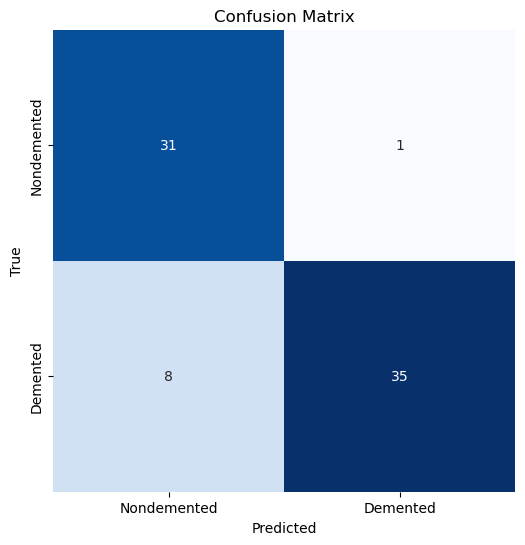

In [40]:
# Importing liberaries 
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score
best_model = best_estimators['XGBClassifier']

# Predictions on the test data
predictions = best_model.predict(X_test)

# Probability estimates for ROC-AUC
prob_predictions = best_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, predictions)
f1_test = f1_score(y_test, predictions)
recall_test = recall_score(y_test, predictions)
roc_auc_test = roc_auc_score(y_test, prob_predictions)

# Printing the evaluation metrics
print(f"Accuracy on Test Data: {accuracy_test:.4f}")
print(f"F1 Score on Test Data: {f1_test:.4f}")
print(f"Recall on Test Data: {recall_test:.4f}")
#print(f"ROC AUC Score on Test Data: {roc_auc:.4f}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False,
            xticklabels=["Nondemented", "Demented"],
            yticklabels=["Nondemented", "Demented"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Accuracy on Test Data: 0.8800
F1 Score on Test Data: 0.8861
Recall on Test Data: 0.8140


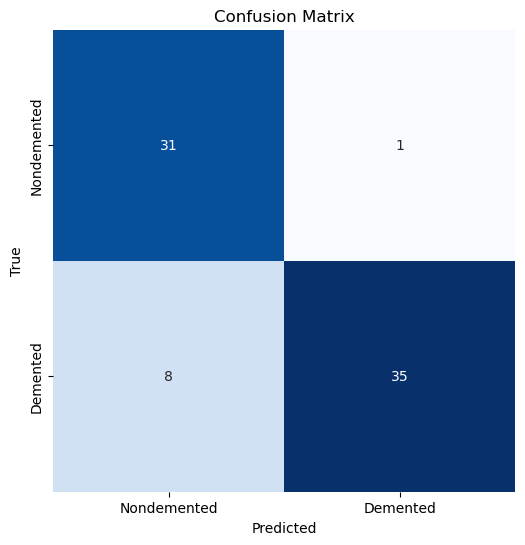

In [42]:
# Importing liberaries 
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score
best_model = best_estimators['XGBClassifier']

# Predictions on the test data
predictions = best_model.predict(X_test)

# Probability estimates for ROC-AUC
prob_predictions = best_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, predictions)
f1_test = f1_score(y_test, predictions)
recall_test = recall_score(y_test, predictions)
roc_auc_test = roc_auc_score(y_test, prob_predictions)

# Printing the evaluation metrics
print(f"Accuracy on Test Data: {accuracy_test:.4f}")
print(f"F1 Score on Test Data: {f1_test:.4f}")
print(f"Recall on Test Data: {recall_test:.4f}")
#print(f"ROC AUC Score on Test Data: {roc_auc:.4f}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False,
            xticklabels=["Nondemented", "Demented"],
            yticklabels=["Nondemented", "Demented"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

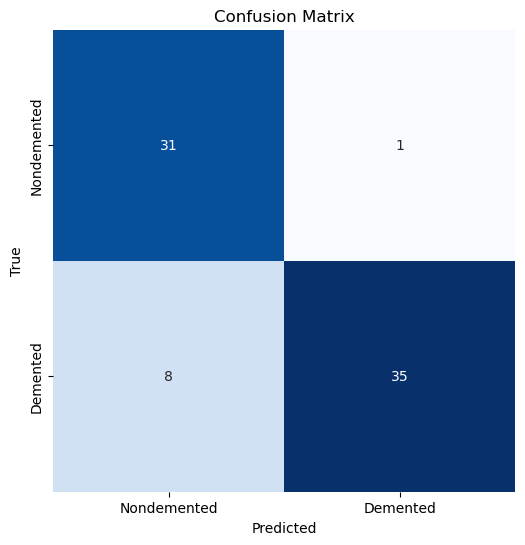

In [43]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False,
            xticklabels=["Nondemented", "Demented"],
            yticklabels=["Nondemented", "Demented"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

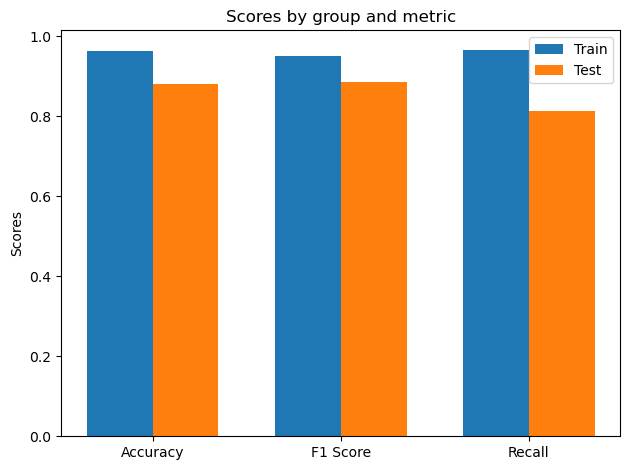

In [45]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score
# Metrics
metrics = ['Accuracy', 'F1 Score', 'Recall']
train_results = [0.963, 0.951, 0.967]
test_results = [0.880, 0.886, 0.814]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Create bar chart
fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, train_results, width, label='Train')
rect2 = ax.bar(x + width/2, test_results, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()

plt.show()
